<a href="https://colab.research.google.com/github/Alexandrerrosa/project/blob/main/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VOLVO TRAINEE PROGRAM
ALEXANDRE RODRIGUES DA ROSA

**Import libraries to use during the code**

During our code we are going to use the following steps:



1.   Import libraries.
2.   Import our data from connected data source to a dataframe.
3.   Execute codes to explore our data: What is our data head? What is the statistical summary? Do we have outliers? Is there any missing values? Is there any basic correlation?
4.   To start to investigate our database we can change our database using pivot code.
5.   Now we can create some graphical analysis as correlation matrix and scatter plot analysis and apply Z-Score to remove outliers and using showing Pearson correlation.







In [1]:
#First we need to import libraries that is going to help in the resolution.
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from scipy import stats
from PIL import Image


print('Libraries imported succesfully!')


Libraries imported succesfully!


In [2]:
#Then we need to read our dataset and import to a panda dataframe
from google.colab import drive
drive.mount('/content/drive')
print('Google database is now connected!')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google database is now connected!


In [3]:
proj_path = '/content/drive/MyDrive/Profissional/Trainee/'

#Load it into a dataframe
data = pd.read_csv(proj_path + 'datasetInterview.csv', dtype={'READING_ID': np.int64, 'PARAMETER': str, 'IDX': np.int64, 'PARAM_VALUE': np.float64})

print('Database loaded to a dataframe!')

Database loaded to a dataframe!


In [4]:
line_count = len(data)
print(f"Count number of lines: {line_count}")
print(f"Number of unique reading equals to {len(data.READING_ID.unique())}")

Count number of lines: 1079978
Number of unique reading equals to 20000


In [5]:
print('Those are data types in our database')
# Get the data types of each column
data_types = data.dtypes
# Print the data types
print(data_types)
print("\n")

print('Show data head in our database')
#Now we are going to start code analysis and exploration
print(data.head())
print("\n")

print('This is statistic numerical summary in database')
# Get summary statistics of the numerical columns
print(data.describe())
print("\n")

print('Sum null function database')
# Count the number of missing values in each column
print(data.isnull().sum())
print("\n")

Those are data types in our database
READING_ID       int64
PARAMETER       object
IDX              int64
PARAM_VALUE    float64
dtype: object


Show data head in our database
   READING_ID    PARAMETER  IDX  PARAM_VALUE
0           0  DRIVE_SPEED    0         7.40
1           0     FUEL_EFF    0         3.76
2           0          GCW    1         0.00
3           0          GCW    2         0.00
4           0          GCW    3         1.32


This is statistic numerical summary in database
         READING_ID           IDX   PARAM_VALUE
count  1.079978e+06  1.079978e+06  1.079978e+06
mean   9.895594e+08  1.194469e+01  4.084413e+00
std    2.855982e+08  8.300776e+00  7.154329e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.048915e+09  5.000000e+00  0.000000e+00
50%    1.129652e+09  1.200000e+01  1.450000e+00
75%    1.134069e+09  1.800000e+01  5.170000e+00
max    1.136808e+09  2.900000e+01  1.000000e+02


Sum null function database
READING_ID     0
PARAMETER      0
IDX      

In [6]:
print('Create a pivot with our database and reordenate our data')
# Pivot the PARAMETER column
df_pivot = data.pivot_table(index='READING_ID', columns='PARAMETER', values='PARAM_VALUE').reset_index()

# Define the desired column order
column_order = ['READING_ID','FUEL_EFF', 'DRIVE_SPEED','SPEED','GCW','SLOPE_1','SLOPE_2','SLOPE_3']  # Specify the desired order of columns

# Reindex the pivoted DataFrame based on the desired column order
pivoted_df = df_pivot.reindex(columns=column_order)
print("\n")
print('This is data head in our database')
# Display the resulting DataFrame
print(pivoted_df)

selected_columns = ['FUEL_EFF', 'DRIVE_SPEED', 'SPEED','GCW','SLOPE_1','SLOPE_2','SLOPE_3']
print("\n")
print('Show to use the mean and average per column after pivot our table')
print("\n")
# Calculate the average for the selected columns
column_stats = pivoted_df[selected_columns].agg(['mean', 'std'])

# Print the column averages
print(column_stats)

Create a pivot with our database and reordenate our data


This is data head in our database
PARAMETER  READING_ID  FUEL_EFF  DRIVE_SPEED   SPEED       GCW  SLOPE_1  \
0                   0      3.76         7.40  4.9980  3.448276     7.66   
1              210970      4.96         5.22  5.0000  3.448621     9.07   
2             2329111      3.91         7.28  4.9990  3.447931     7.13   
3             3040660      2.89         5.83  5.0000  3.448621     6.91   
4             4936916      4.33         7.60  4.9995  3.447931     7.81   
...               ...       ...          ...     ...       ...      ...   
19995      1136797671      5.55         7.32  4.9995  3.448621     9.98   
19996      1136798047      3.05         5.07  5.0000  3.447586     8.37   
19997      1136801478      2.54         3.82  5.0000  3.447931     5.03   
19998      1136803392      2.28         2.79  4.9995  3.448276     7.57   
19999      1136807896      3.40         6.41  5.0000  3.448621     8.04   

PARAME



Select specific columns to show correlation between then using a special scale.


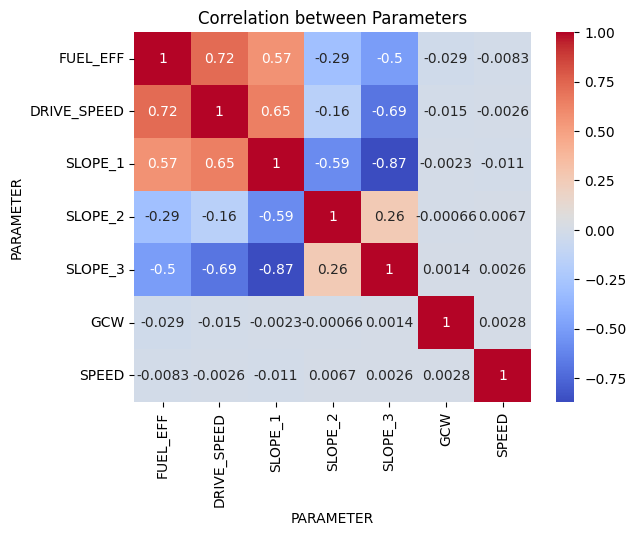

In [7]:
print("\n")
print('Select specific columns to show correlation between then using a special scale.')

correlation_cols = ['FUEL_EFF', 'DRIVE_SPEED', 'SLOPE_1', 'SLOPE_2', 'SLOPE_3', 'GCW', 'SPEED']
correlation_df = pivoted_df[correlation_cols]
# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Generate the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.title('Correlation between Parameters')
plt.show()

In [8]:
print("\n")
print('Create a z-score analysis to remove outliers from this code to see if correlation matrix works better in next step.')

# Define the list of parameters including GCW and SPEED dimensions
parameters = ['FUEL_EFF', 'DRIVE_SPEED', 'SLOPE_1', 'SLOPE_2', 'SLOPE_3']

# Remove outliers for each parameter
df_cleaned = df_pivot.copy()

for parameter in parameters:
    if parameter in ['GCW', 'SPEED']:
        # Remove outliers for each dimension separately
        dimensions = df_cleaned.columns[df_cleaned.columns.str.startswith(parameter)]
        
        for dimension in dimensions:
            z_scores = zscore(df_cleaned[dimension])
            outliers = np.abs(z_scores) > 3  # Adjust the z-score threshold as needed
            df_cleaned = df_cleaned[~outliers]
    else:
        # Remove outliers for single-dimensional parameters
        z_scores = zscore(df_cleaned[parameter])
        outliers = np.abs(z_scores) > 3  # Adjust the z-score threshold as needed
        df_cleaned = df_cleaned[~outliers]

# Reset the index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)



Create a z-score analysis to remove outliers from this code to see if correlation matrix works better in next step.


Check that correlation matrix decreased, but value_speed parameter is almost the same.




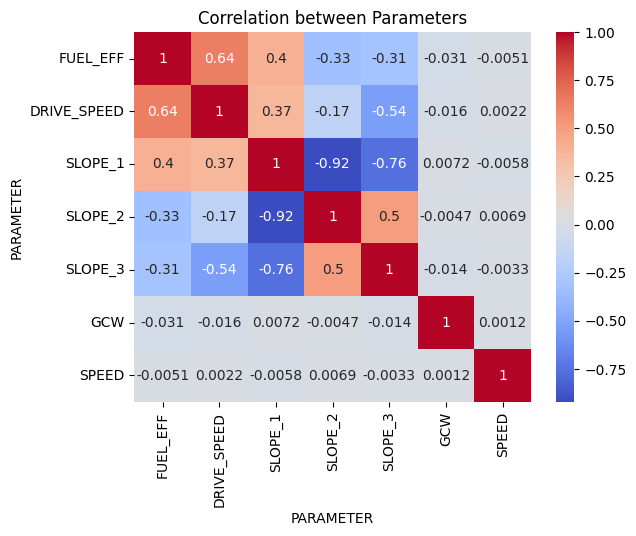

In [9]:
print('Check that correlation matrix decreased, but value_speed parameter is almost the same.')
print("\n")

correlation_cols = ['FUEL_EFF', 'DRIVE_SPEED', 'SLOPE_1', 'SLOPE_2', 'SLOPE_3', 'GCW', 'SPEED']
correlation_df = df_cleaned[correlation_cols]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Generate the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.title('Correlation between Parameters')
plt.show()

Database loaded to a dataframe.
Recreate our dataframe and create another correlation matrix calculating z-score and iterating over different parameters
A z-score shows to us that almost 99% of confidence and p-value also is <0.01.

Recreate our dataframe and create another correlation matrix calculating z-score and iterating over different parameters
A z-score shows to us that almost 99% of confidence and p-value also is <0.01.




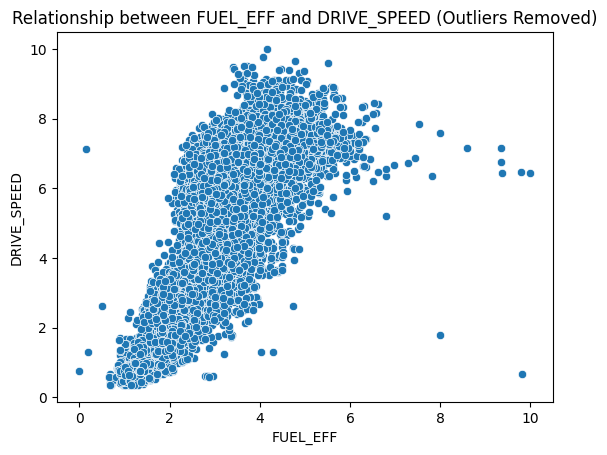

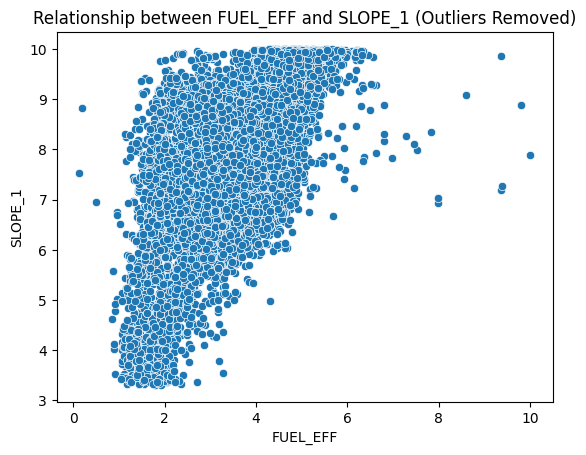

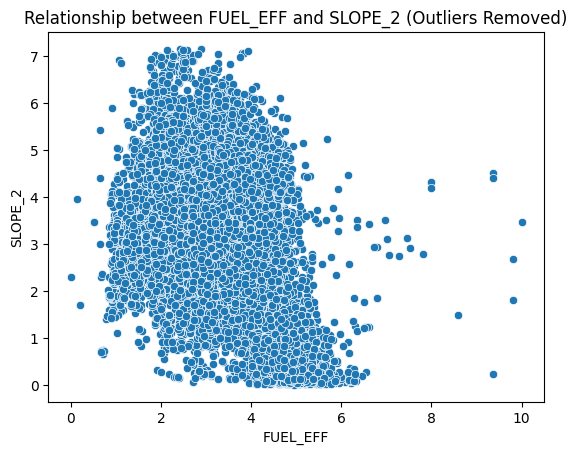

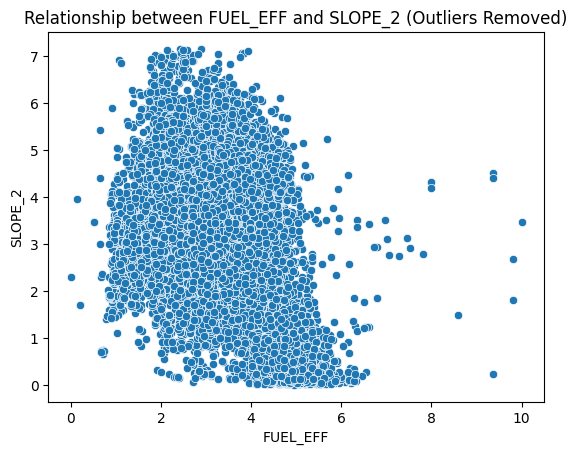

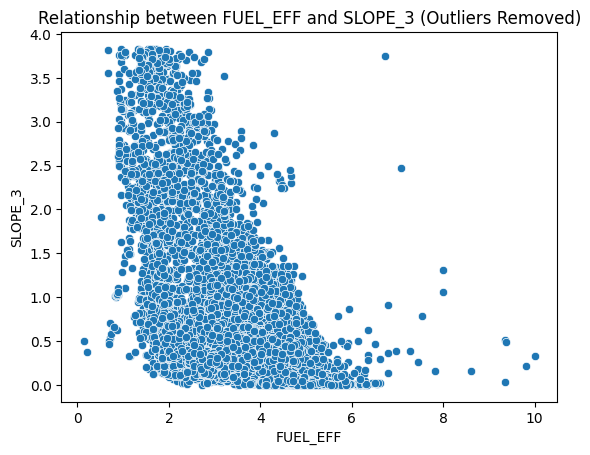

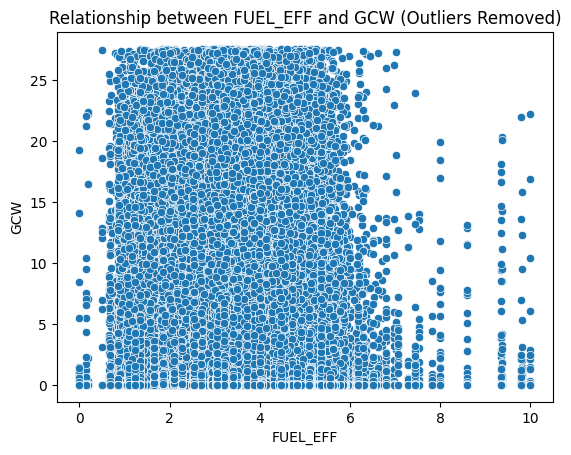

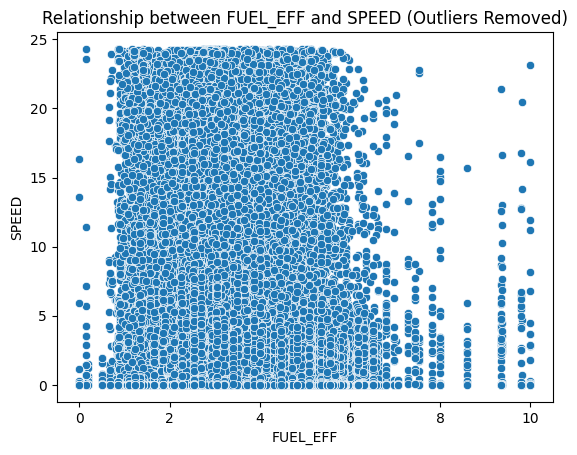

In [16]:
print("Recreate our dataframe and create another correlation matrix calculating z-score and iterating over different parameters")
print('A z-score shows to us that almost 99% of confidence and p-value also is <0.01.')
print("\n")

# Filter rows with FUEL_EFF parameter
fuel_eff_df = data[data['PARAMETER'] == 'FUEL_EFF']

# Select the other parameters
other_params = ['DRIVE_SPEED', 'SLOPE_1', 'SLOPE_2', 'SLOPE_2', 'SLOPE_3', 'GCW', 'SPEED']

# Create a correlation matrix
correlation_matrix = pd.DataFrame(columns=['Parameter', 'Correlation'])

# Iterate over the other parameters
for param in other_params:
    # Filter rows with the current parameter
    param_data = data[data['PARAMETER'] == param]
    
    # Calculate the z-score for each value in the current parameter
    z_scores = np.abs((param_data['PARAM_VALUE'] - param_data['PARAM_VALUE'].mean()) / param_data['PARAM_VALUE'].std())
    
    # Define a threshold for outliers (e.g., z-score greater than 3, 99.7% of normally distributed data falls in this range
    threshold = 3
    
    # Filter out the outliers from the current parameter
    filtered_param_data = param_data[z_scores <= threshold]
    
    # Merge the FUEL_EFF and filtered parameter dataframes on READING_ID
    merged_df = pd.merge(fuel_eff_df[['READING_ID', 'PARAM_VALUE']], filtered_param_data[['READING_ID', 'PARAM_VALUE']], on='READING_ID')
    
    # Calculate the correlation coefficient between FUEL_EFF and the filtered parameter
    correlation = merged_df['PARAM_VALUE_x'].corr(merged_df['PARAM_VALUE_y'])
    
    # Add the correlation to the correlation matrix
    correlation_matrix = pd.concat([correlation_matrix, pd.DataFrame({'Parameter': [param], 'Correlation': [correlation]})], ignore_index=True)

    # Create a scatter plot to visualize the relationship
    sns.scatterplot(data=merged_df, x='PARAM_VALUE_x', y='PARAM_VALUE_y')
    plt.xlabel('FUEL_EFF')
    plt.ylabel(param)
    plt.title(f"Relationship between FUEL_EFF and {param} (Outliers Removed)")
    plt.show()

In [11]:
data_frame = data.copy()

data_frame['IDX'] = data_frame['IDX'].astype(str)

# Concatenate the columns
data_frame['NEW_PARAMETER'] = data_frame['PARAMETER'] + data_frame['IDX']

# To drop old PARAMETER and IDX columns.
data_frame.drop(['PARAMETER', 'IDX'], axis=1, inplace=True)

# Define the new order of columns
new_order = ['READING_ID', 'NEW_PARAMETER', 'PARAM_VALUE']

# Reindex the DataFrame with the new column order
data_frame = data_frame.reindex(columns=new_order)

df_pivot_2 = data_frame.pivot_table(index='READING_ID', columns='NEW_PARAMETER', values='PARAM_VALUE').reset_index()

# To drop READING_ID column to create correlation matrix.
df_pivot_2.drop(['READING_ID'], axis=1, inplace=True)

# Select the fuel_eff column from the DataFrame
specific_column = df_pivot_2['FUEL_EFF0']

# Calculate the correlation matrix between fuel_eff and other parameters
correlation_matrix = df_pivot_2.corr()

# Select the correlation values of specific column from the correlation matrix
correlation_with_fuel_eff = correlation_matrix.loc[:, 'FUEL_EFF0']

#Sor the correlation values 
correlation_with_fuel_eff_sorted = correlation_with_fuel_eff.sort_values(ascending=False)

# Print the correlation matrix with specific column
print("\n")
print('Number of correlation between FUEL_EFF and each multi-dimensional parameters.')
print(correlation_with_fuel_eff_sorted)




Number of correlation between FUEL_EFF and each multi-dimensional parameters.
NEW_PARAMETER
FUEL_EFF0       1.000000
DRIVE_SPEED0    0.723290
SPEED13         0.602108
SLOPE_10        0.568554
GCW9            0.444470
GCW15           0.433891
GCW8            0.421511
SPEED14         0.410016
SPEED12         0.387504
GCW16           0.377810
SPEED15         0.330116
SPEED11         0.305538
SPEED10         0.274171
GCW3            0.204510
SPEED9          0.180952
SPEED16         0.168655
GCW17           0.155053
GCW14           0.155020
GCW7            0.147724
SPEED17         0.119880
SPEED8          0.106224
SPEED18         0.084679
GCW10           0.063177
SPEED19         0.060546
SPEED20         0.033944
GCW2            0.004023
GCW1            0.000136
GCW4           -0.050417
SPEED7         -0.067434
GCW13          -0.101277
GCW11          -0.113623
GCW12          -0.119439
GCW5           -0.125737
GCW28          -0.150247
GCW29          -0.157538
GCW6           -0.169849
GCW22 